<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#SIFT-Descriptors-on-an-Image" data-toc-modified-id="SIFT-Descriptors-on-an-Image-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>SIFT Descriptors on an Image</a></span></li><li><span><a href="#SIFT-Descriptors-Classification-Prediction" data-toc-modified-id="SIFT-Descriptors-Classification-Prediction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>SIFT Descriptors Classification Prediction</a></span><ul class="toc-item"><li><span><a href="#Testing" data-toc-modified-id="Testing-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Testing</a></span></li></ul></li></ul></div>

# Bag of Visual Words

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

## SIFT Descriptors on an Image

In [2]:
img = cv2.imread('train/0.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints = sift.detect(gray,None)

In [3]:
img = cv2.drawKeypoints(gray, keypoints, outImage = None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints.jpg',img)

True

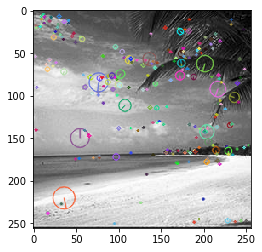

In [4]:
plt.imshow(img)

## SIFT Descriptors Classification Prediction

In [5]:
image_list = []
for filename in glob.glob('train/*.jpg'): 
    im=Image.open(filename)
    image_list.append(np.asarray(im.resize((250, 250))))

In [6]:
descriptors_list = np.array([])
for pic in image_list:
    keypoints, descriptors = cv2.xfeatures2d.SIFT_create().detectAndCompute(pic, None)
    descriptors_list = np.append(descriptors_list, descriptors)

descriptors_list = np.reshape(descriptors_list, (len(descriptors_list)//128, 128))
descriptors_list = np.float32(descriptors_list)

In [7]:
k_means = KMeans(n_clusters = 100)
k_means.fit(list(descriptors_list))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=100, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [8]:
def frequency_histogram(descriptor_list, k_means):
    histogram = np.zeros(len(k_means.cluster_centers_))
    clusters =  k_means.predict(descriptors_list)
    for i in clusters:
        histogram[i] += 1.0
    return histogram

In [9]:
bags_of_visual_words = []
for image in image_list:
    keypoint, descriptor = cv2.xfeatures2d.SIFT_create().detectAndCompute(image, None)
    if descriptor is not None:
        histogram = frequency_histogram(descriptor, k_means)
        bags_of_visual_words.append(histogram)

### Testing

In [37]:
test_data = cv2.imread('test/20.jpg')
keypoint, descriptor = cv2.xfeatures2d.SIFT_create().detectAndCompute(test_data, None)
histogram = frequency_histogram(descriptor, k_means)
Neighbors = NearestNeighbors(n_neighbors = 20)
Neighbors.fit(bags_of_visual_words)
distance, outcome = Neighbors.kneighbors([histogram])

In [39]:
outcome = [item for sublist in outcome for item in sublist]
print(outcome)
distance

[16, 2, 4, 15, 0, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 14, 6, 3]


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

Text(0.5, 0, 'Visual Word')

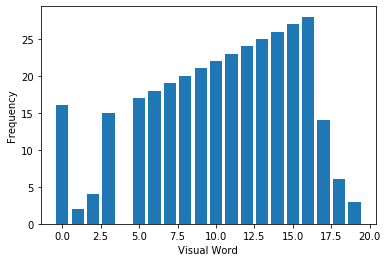

In [42]:
plt.bar(np.arange(len(outcome)), outcome)
plt.ylabel('Frequency')
plt.xlabel('Visual Word')